## Customer Segmentation using RFM 

## Content

1. Introduction
2. Imports
3. Definitions
4. Data Preprocessing
5. RFM Table
6. Managing skewness of the data and variable scaling
7. Data Clustering
8. Interpretation of results

# 1. Introduction

## 1.1 Problem Landscape

Suppose that we have a company that selling some of the product, and you want to know how well does the selling performance of the product. You have the data that can we analyze, but what kind of analysis that we can do?

Well, we can segment customers based on their buying behavior on the market.
Keep in mind that the data is of a large scale, and we can not analyze it using our bare eye. We will use machine learning algorithms and the power of computing for it.

Problem: Inability to segment customer base using naked eye or physical labour, there is a need for big solutions for big data being created by customers

Value : Understanding of the different clusters of customers the company has, with the understanding of the different metrics they have

## 1.2 Problem statement

Cluster customers on segments based on their behavior using the K-Means algorithm 

# 2. Imports

In [1]:
#imports
import pandas as pd #for using dataframes
import matplotlib.pyplot as plt #for plotting graphs
import seaborn as sns #for plotting graphs
import datetime as dt #for working with timestamps
from datetime import datetime
import datetime
from scipy import stats #for use of managing skewness and stats 
import numpy as np # for dealing with numeric variables
from sklearn.preprocessing import StandardScaler # to normalise the variables
from sklearn.cluster import KMeans # for clustering

# 3. Definitions

We will take the data from UCI Machine Learning called Online Retail dataset.
The dataset itself is a transactional data that contains transactions from December 1st 2010 until December 9th 2011 for a UK-based online retail.

In [2]:
#Read excel data into a pandas data frame 'df'
df = pd.read_excel(r'/content/Online Retail.xlsx')

In [3]:
#View top 5 entries of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
# Apply the info() method to see the contents of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


*   **InvoiceNo**: Unique numbers generated by a business issuing an invoice to a client 
*   **StockCode**: Unique numbers that identifies an item of stock on a stock quotation scheme
*   **Description**: Description of the product
*   **Quantity**: The amount or number specific item (>0)
*   **InvoiceDate**: Date Item was issued (YYYY-MM-DD HH:MM:SS)
*   **UnitPrice**: Unit price is the price for a single unit of measure of a product sold 
*   **CustomerID**: unique number used to identify your customers
*   **Country**: Country name of retail sales











# 4. Data Prepocessing

There seems to be an issue partaining to the 'CustomerID' feature into the dataset, as it has less values (406829) compared to the rest of the features (541909). Due to this, we will look to do some data cleaning and removal of Null Values

In [5]:
#Remove all null values to select only customers with a customer ID 
df = df[df['CustomerID'].notna()]

For the sake of using a localised environement and not a large virtual machine to run big data jobs, we will be using a subset of the data and make the assumption that a large enough sample will be representative of the data of al customers.

In [6]:
#Use the sample to select a random sample of the data with the random_state set at 42
df_sampled = df.sample(10000, random_state = 42)
df_sampled.shape #View the shape of the new dataframe to see that we have 10000 data values

(10000, 8)

# 5. RFM Table

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service.



*   Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
*   Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
*   Monetary Value (M): Who have high purchase amount? It means the total money customer spent (high monetary value)





## 5.1 Create the RFM Table

RFM Analysis
Here, you are going to perform following opertaions:

*   For Recency, Calculate the number of days between present date and date of last purchase each customer.
*   For Frequency, Calculate the number of orders for each customer.
*   For Monetary, Calculate sum of purchase price for each customer.






In [7]:
# Convert the InvoiceDate to only show the date of the purchase
df_sampled["InvoiceDate"] = df_sampled["InvoiceDate"].dt.date

In [8]:
# Create a new TotalSum column for the total amount a customer purchased
df_sampled["TotalSum"] = df_sampled["Quantity"] * df_sampled["UnitPrice"]

# Create date variable that records recency
snapshot_date = max(df_sampled.InvoiceDate) + datetime.timedelta(days=1)

In [9]:
# Find all aggregated sum of all the data of the customers
customer_agg = df_sampled.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

In [10]:
# Rename all the columns to rcency, frequency and MonetaryValue
customer_agg.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'TotalSum': 'MonetaryValue'}, inplace=True)

In [11]:
#Show top 5 values of our new RFM Table
customer_agg.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,40,5,133.20
12348.0,249,2,120.88
12349.0,19,2,312.75
12352.0,73,5,80.85
12354.0,233,2,33.30


## 6. Managing skewness of the data and variable scaling

When dealing with data, we have to make sure that it meets the assumption where the variables are not skewed and have the same mean and variance. Due to this, we have to manage the skewness of the data

There are ways to manage skewness of the data, which includes 


*  Log transformation
*  Square root transformation
*  Box-cox transformation

When it comes to transformation of the data, we can only use the transformation of the data if and only if the values of the data are positive





/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

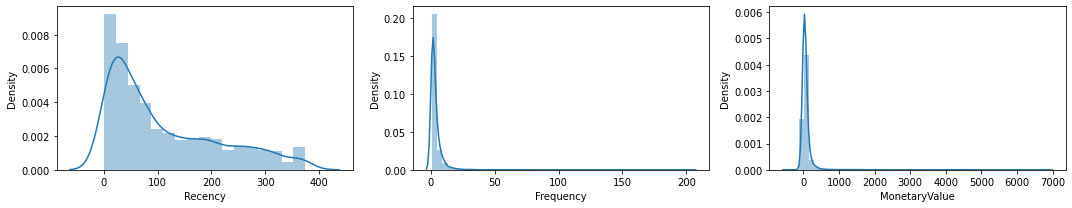

In [12]:
# Create distribution plots of out RFM table values to see the skewness of the data
fig, ax = plt.subplots(1, 3, figsize=(15,3))
sns.distplot(customer_agg['Recency'], ax=ax[0]) # Distribution plot for the recency
sns.distplot(customer_agg['Frequency'], ax=ax[1]) # Distribution plot for the frequency
sns.distplot(customer_agg['MonetaryValue'], ax=ax[2]) # Distribution plot for the Monetary Value
plt.tight_layout()
plt.show()

As we can see on all three plots, the values all contain a left skewness to its values. Since the values are not closer and more centered around the value of the mean, we will look to transform all three valiables. We will thus perform all three transformations to the data to see which transformations are to be made

In [13]:
def skewness(column):
  """Fuction that returns a distribution plot of the original, log transformation, square root transformation and box-cox transformation
  Parameters
  ----------
  column: String
            Name of the dataframe column
  Returns
  -------
  plt.show(): Seaborn Distribution Plots
           Four Distribution plots of the data values and subsequent tranformations of the data

  """
  fig, ax = plt.subplots(2, 2, figsize=(5,5))
  sns.distplot(customer_agg[column], ax=ax[0,0])
  sns.distplot(np.log(customer_agg[column]), ax=ax[0,1])
  sns.distplot(np.sqrt(customer_agg[column]), ax=ax[1,0])
  sns.distplot(stats.boxcox(customer_agg[column])[0], ax=ax[1,1])
  plt.tight_layout()
  plt.show()
    
  print(customer_agg[column].skew().round(2))
  print(np.log(customer_agg[column]).skew().round(2))
  print(np.sqrt(customer_agg[column]).skew().round(2))
  print(pd.Series(stats.boxcox(customer_agg[column])[0]).skew().round(2))

The above function will return four distribution plots displaying the original data (which will appear on the top left), with the subsequent distributions of each transformation to help us analyse which variables need to be transformed in what way.

The function will also calculate the skewness value of each trasnformation, and the closer value to 0 is more symmetrical

### 6.1 Recency skewness

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

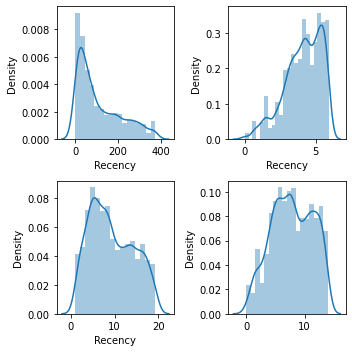

0.93
-0.72
0.32
-0.1


In [14]:
skewness('Recency')

When we evaluate the skewness that arises from the Recency values and trasnformations, when we use an eye test, we see the box-cox trasnformation has a far more symmetrical look to the data (which is the ideal way). To also make sure, we calculated the skewness values in the fuction.

It also has a skewness value of -0.1 (which seems to be closer to 0 than any other trasnformation)

### 6.2 Frequency Skewness

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

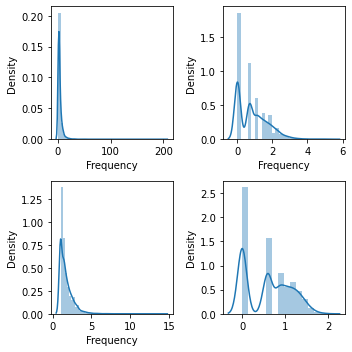

14.77
0.85
3.67
0.16


In [15]:
skewness('Frequency')

Similar to the Recency transformations, when we use the eye test, the values of the box-cox trasnformation has a more symmertrical look. 

To evalue the skewness value, we also see the box-cox trasnformation value has a skewness value of 0.16 which is the closest to 0

### 6.3 MonetaryValue

In [16]:
# See the summary statistics of the RFM table
customer_agg.describe()

,Recency,Frequency,MonetaryValue
count,2690.000000,2690.000000,2690.000000
mean,110.934201,3.717472,73.625743
std,102.377871,7.176189,254.950467
min,1.000000,1.000000,-419.400000
25%,27.000000,1.000000,14.850000
50%,72.000000,2.000000,30.000000
75%,179.750000,4.000000,67.622500
max,374.000000,203.000000,6828.280000


As we have evaluated from above, the MonetaryValue has a minimum value of -419.4 which goes against some of the previous transformation rule where trasnformations can only be done on values which are positive ( above 0). 

The one way we can thus tranform negative values for the Monetary Value variable is to apply a cubic trasnformation as should below

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


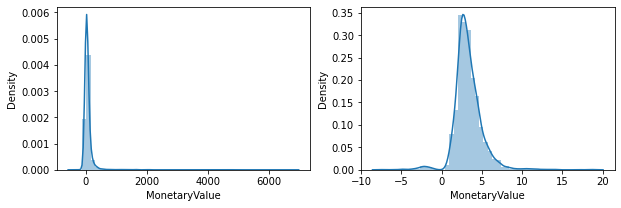

16.63
1.16


In [17]:
# Create a displot and cubic trasnformation of the MonetaryValue variable
fig, ax = plt.subplots(1, 2, figsize=(10,3))
sns.distplot(customer_agg['MonetaryValue'], ax=ax[0])
sns.distplot(np.cbrt(customer_agg['MonetaryValue']), ax=ax[1])
plt.show()
print(customer_agg['MonetaryValue'].skew().round(2))
print(np.cbrt(customer_agg['MonetaryValue']).skew().round(2))

The cubic transformation gives us a more symmetrical plot of values than the original, with a skewness value significantly lower at 1.16 as compared to the original of 16.63

### 6.4 Variable scaling

We will now scale the data according to the above mentioned transformations for each variable

In [18]:
# Create new dataframe with new trasformed numbers of the RFM table
customers_rfm = pd.DataFrame() # Create new dataframe for new values
customers_rfm["Recency"] = stats.boxcox(customer_agg['Recency'])[0] # Transform Recency with boxcox
customers_rfm["Frequency"] = stats.boxcox(customer_agg['Frequency'])[0] #Transform  Frequency with boxcox 
customers_rfm["MonetaryValue"] = pd.Series(np.cbrt(customer_agg['MonetaryValue'])).values # Transform values with cubic transformation
customers_rfm.head()

,Recency,Frequency,MonetaryValue
0,6.152222,1.127547,5.107026
1,12.180045,0.591193,4.944452
2,4.402867,0.591193,6.787853
3,7.832068,1.127547,4.324076
4,11.907953,0.591193,3.217225


## 6.5 Centering Values

As we can tell from the last five entries of the new RFM table, we can see that the means and standard deviations do not have the same variance and same mean, we have to thus standardise the values through normalising the data (which will make all variables have a mean of 0 and standard deviation of 1). We will perform this using the scikit-learn library

In [19]:
# Use the scikit-learn StandardScaler to scale the variables to have mean of 0 and standard deviation of 1
scaler = StandardScaler() # Call the standard scaler object

scaler.fit(customers_rfm) # Fit the data of the new rfm to scale the data

normalised_rfm = scaler.transform(customers_rfm) # Transform the data to have mean 0 and standard deviation of 1

print(normalised_rfm.mean(axis = 0).round(2)) # Print new normalised variables means
print(normalised_rfm.std(axis = 0).round(2)) #Print new variables standard deviation to test

[ 0. -0.  0.]
[1. 1. 1.]


In [20]:
# Display the head of the normalised data
pd.DataFrame(normalised_rfm).tail()

,0,1,2
2685,-0.012582,-0.017412,0.052265
2686,-1.892510,1.603908,1.472436
2687,-1.027712,-0.017412,-2.833266
2688,-1.779053,1.949001,0.543657
2689,-0.439802,0.801023,0.437980


We can now perform clustering of the data effectively

# 7. Data Clustering

We have now gone through the process of preprocessing the data, and now we aim to segment the data. We will use a K-Means clustering algorithm to do this

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

To get the best out of our model using K-Means, we have to know how to select the best K, which will be done using th elbow method, which is a method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use

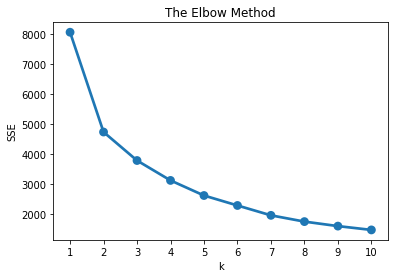

In [21]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalised_rfm)
    sse[k] = kmeans.inertia_ # SSE to closest cluster centroid
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The different values of K appear on the X-axis. Where the sum of squared error appears on the y-axis. We want to select the K-value where the line starts to become straight or linear. Looking at the plot, the best value of K is 3. We will now cluster the customers into 3 clusters

In [22]:
# Fit model to 3 K clusters 
model = KMeans(n_clusters=3, random_state=42)
model.fit(normalised_rfm)
model.labels_.shape

(2690,)

In [23]:
#Show shape of original RFM table
customer_agg.shape

(2690, 3)

As we can see the original RFM table follows the same shape of the normalised_rfm table we have create from the transformed values of the customer RFM. The labels need to be added to the original RFM table and we can finally classify the different clusters each customer belongs to and intepret from our findings the characteristics of each cluster

## 8. Interpret the results

We will now be fitting each customer to their different clusters and calculate the mean of each of the variables to understand the different metrics in a cluster

In [24]:
# Create a Cluster column on the original RFM table and calculate the means of each variable
customer_agg["Cluster"] = model.labels_ # Fit clusters to each customer
customer_agg.groupby('Cluster').agg({ #Use a groupby of each cluster to find all the means of each variable in a cluster
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean', 'count']}).round(2)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         47.29      1.61         21.57   808
1        226.77      1.64         28.67   959
2         46.29      7.72        165.91   923

As we can see from the table above, each cluster has the averages shown above with how many customers each cluster of customers contain. We will now make further analysis of the clusters using a snake plot. The snake plot can visualise the differences in the clusters efficiently. It will make use of the normalised data and the labels of each cluster

In [25]:
# Create a new normalised dataframe for the snake plot
norm_df = pd.DataFrame(normalised_rfm, columns=['Recency', 'Frequency', 'MonetaryValue'])
norm_df['ID'] = customer_agg.index
norm_df['Cluster'] = model.labels_

In [26]:
# Use the melt to melt all the data values together
norm_melt_df = pd.melt(norm_df.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','MonetaryValue'],
                      var_name='Attribute',
                      value_name='Value')
norm_melt_df.head()

,ID,Cluster,Attribute,Value
0,12347.0,2,Recency,-0.493794
1,12348.0,1,Recency,1.232949
2,12349.0,2,Recency,-0.994917
3,12352.0,2,Recency,-0.012582
4,12354.0,1,Recency,1.155005


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


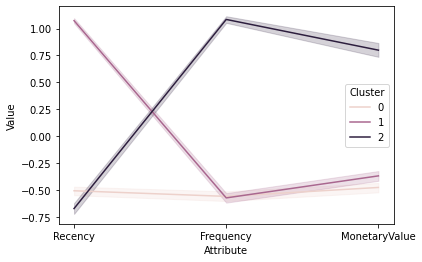

In [27]:
# Visualize the data
sns.lineplot('Attribute', 'Value', hue='Cluster', data=norm_melt_df)

As we can see with the above plot, we can see cluster 0 has customers that generally spend less, less frequently but more recently. this is an indication of a new customer base that we have received. We can thus make the necessary measures to understand more about their behaviour

The cluster 1 shows us a customer base that does not but recently enough, spends less frequently and spends less money. This is our churned client base

The cluster 2 is a client base that spends more money, buys more frequently and buys most recently. This is an indication of our loyal customers.

We can thus both look at the norm_df to see just how many client we have in each cluster, the means of each variable with the snake plot visualising the difference to make it more clear what the behaviour of each client base is.